# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Upload dataset

In [4]:
data = pd.read_csv("titanic_train.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# check no of rows and columns in dataset

In [6]:
data.shape   #(rows,column)

(418, 12)

# Check the name of the columns

In [7]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Check the detail about the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Check the Null values in column

In [9]:
data.isnull().sum()      # three column which has missing values
                         # age, cabin and embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Drop the column Cabin

In [10]:
data.drop(columns=['Cabin'],inplace=True)   #Because in cabin there are 70% values are missing

# Fill the missing value column (Age) with Mean value

In [11]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Fill the missing values in Embarked column 

## Check which city repeat more

In [12]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## Replace the most repeated value in Embarked column with NaN value

In [13]:
data['Embarked'].fillna('S', inplace = True)

# Change the inappropriate data type of the columns

In [14]:
data['Survived']= data['Survived'].astype('category')
data['Pclass']= data['Pclass'].astype('category')
data['Sex']= data['Sex'].astype('category')
data['Age']= data['Age'].astype('int')
data['Embarked']= data['Embarked'].astype('category')

# Now check the data Information which we perform

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    int32   
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         417 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 23.5+ KB


# Check five point summary on numerical columns

In [16]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.191388,0.447368,0.392344,35.627188
std,120.810458,12.654104,0.896760,0.981429,55.907576
min,892.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


# Now perform Univariate Analysis

## Let's start with the target column (Survived)

<Axes: xlabel='Survived', ylabel='count'>

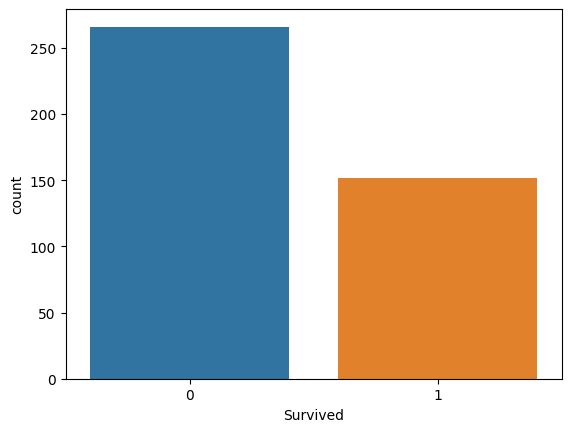

In [17]:

sns.countplot(x=data['Survived'])


Out of 891 30 died in accident 


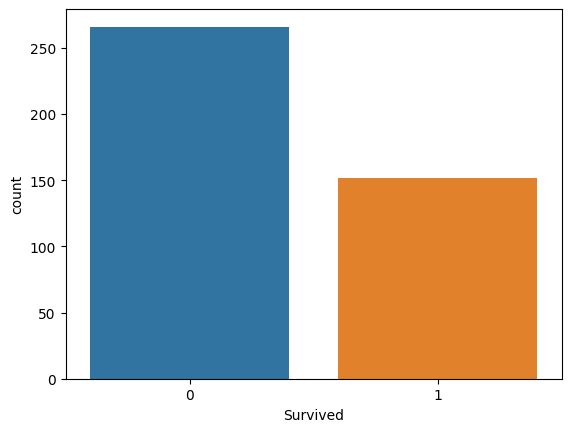

In [19]:
sns.countplot(x=data['Survived'])
death_percent = round((data['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 {} died in accident ".format(death_percent))

## Check distribution of Pclass column

3    24.466891
1    12.008979
2    10.437710
Name: Pclass, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

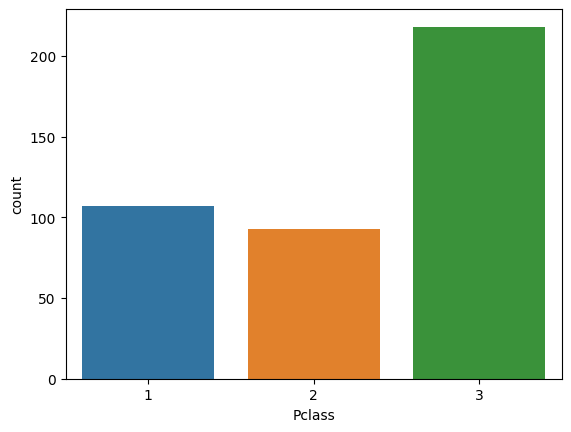

In [24]:
# print((x= data['Pclass'].value_counts()/891)*100)
# sns.countplot(data['Pclass'])
import seaborn as sns
# Calculate the percentage of each Pclass category
x = (data['Pclass'].value_counts() / 891) * 100
# Print the percentage values
print(x)
# Plot the countplot using seaborn
sns.countplot(x=data['Pclass'])


male      63.636364
female    36.363636
Name: Sex, dtype: float64


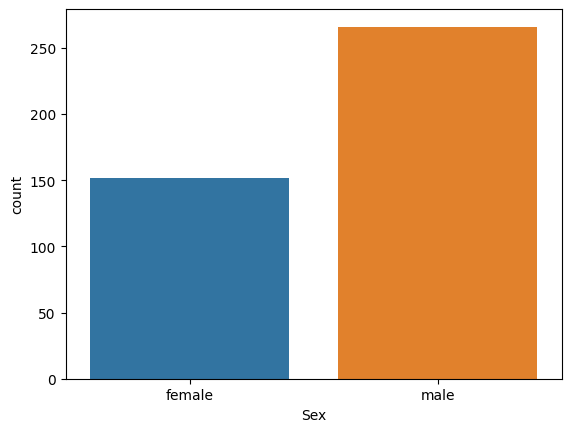

In [25]:
# print((data['Sex'].value_counts()/891)*100)
# sns.countplot(data['Sex'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sex_counts = (data['Sex'].value_counts() / len(data)) * 100
print(sex_counts)
sns.countplot(x= data['Sex'])
plt.show()  


0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


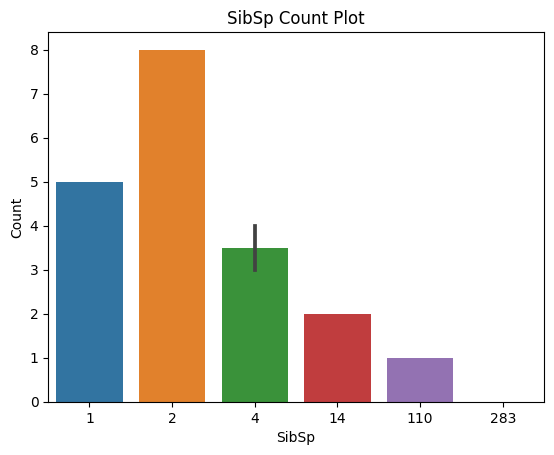

In [33]:
#print(data['SibSp'].value_counts())
#sns.countplot(data['SibSp'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming data is your DataFrame
print(data['SibSp'].value_counts())
# Create a horizontal bar plot
sns.barplot(y=data['SibSp'].value_counts().index, x=data['SibSp'].value_counts(), orient='v')
plt.ylabel('Count')  # Optional: add labels to the axes for clarity
plt.xlabel('SibSp')
plt.title('SibSp Count Plot')
plt.show()


0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


<Axes: xlabel='Parch', ylabel='count'>

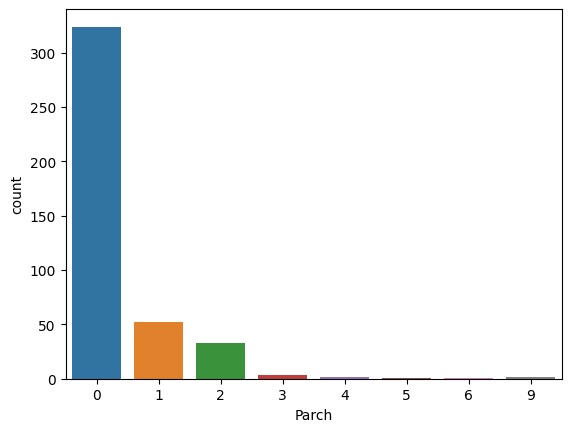

In [34]:
print(data['Parch'].value_counts())
sns.countplot(x=data['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

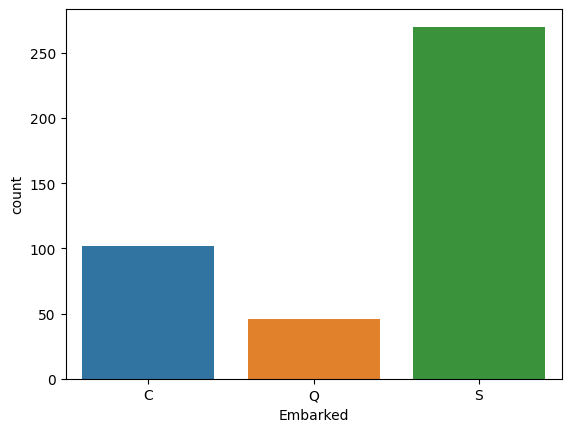

In [35]:
# sns.countplot(data['Embarked'])
sns.countplot(x=data['Embarked'])

## Now check the distplot of Age Column

C:\Users\Fjwu\AppData\Local\Temp\ipykernel_9508\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

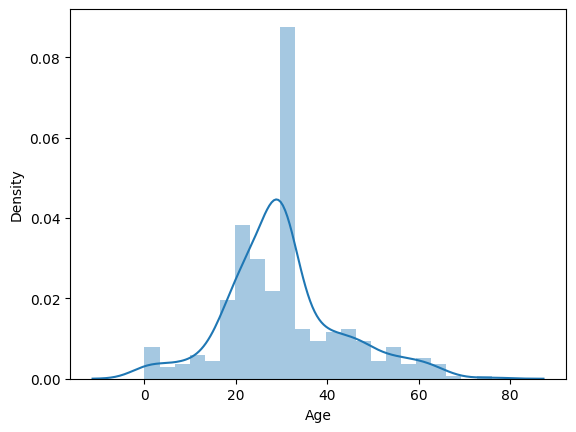

In [36]:
sns.distplot(data['Age'])

In [37]:
print(data['Age'].skew())    # data closely related to normal distribution
print(data['Age'].kurt())    # Peak of the distribution is also normal

0.516080054627597
0.9003780571212805


<Axes: >

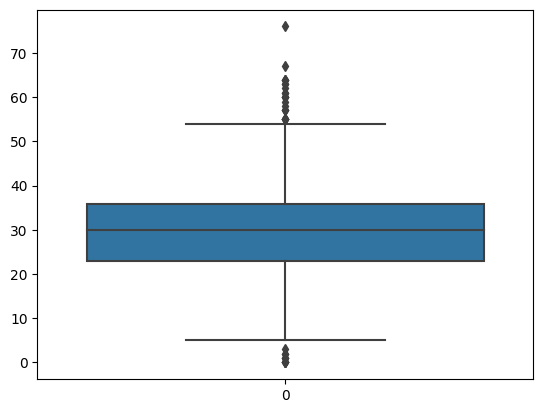

In [38]:
sns.boxplot(data['Age'])

C:\Users\Fjwu\AppData\Local\Temp\ipykernel_9508\2921470011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

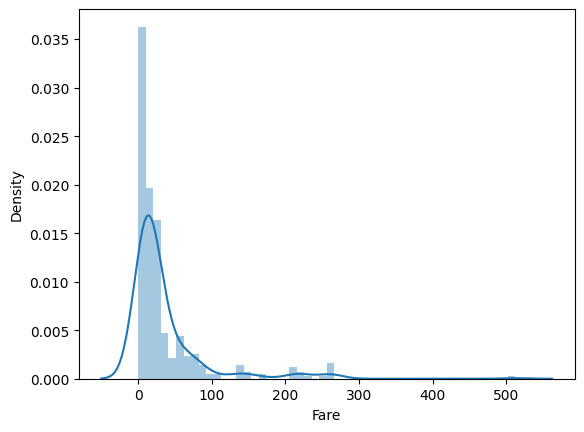

In [39]:
sns.distplot(data['Fare'])

In [40]:
print(data['Fare'].skew())    # data is too right skewed
print(data['Fare'].kurt())    # peak is also extremely high

3.6872133081121405
17.92159525773599


<Axes: xlabel='Fare'>

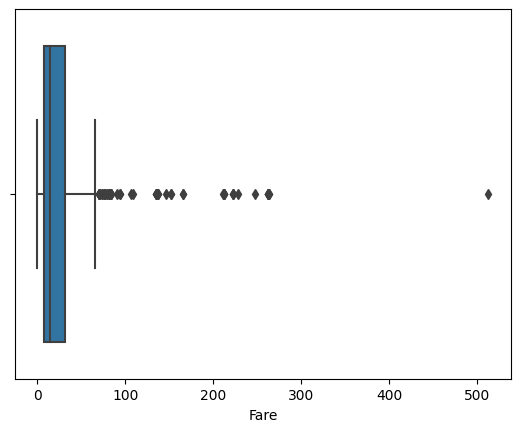

In [41]:
sns.boxplot(x=data['Fare'])

# Perform Multivariate Analysis

## survival with pclass

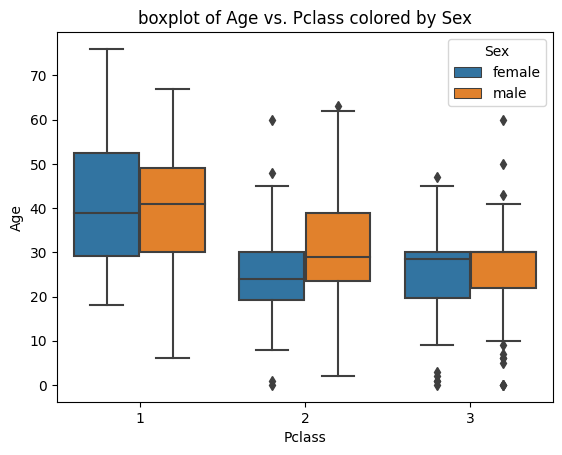

In [45]:
#sns.countplot(data['Survived'], hue=data['Pclass'])
# sns.countplot(data['Pclass'],data['Age'],hue=data['Sex'])
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is your DataFrame
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=data)
plt.title('boxplot of Age vs. Pclass colored by Sex')
plt.show()


## Pair pplot

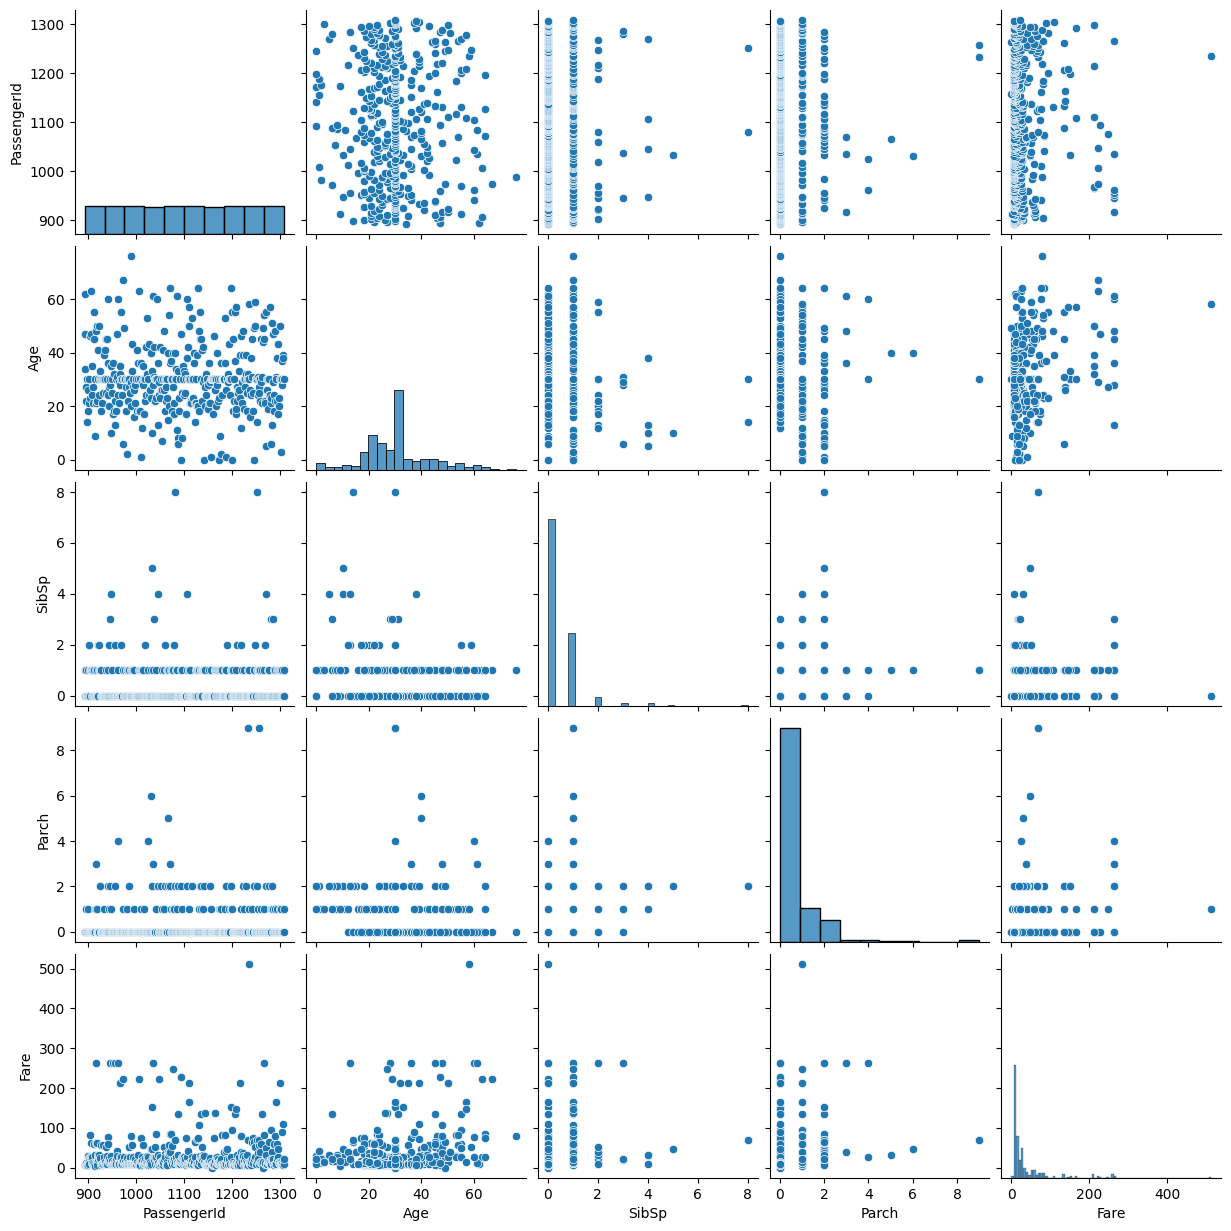

In [46]:
sns.pairplot(data)

C:\Users\Crown Tech\AppData\Local\Temp\ipykernel_5912\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

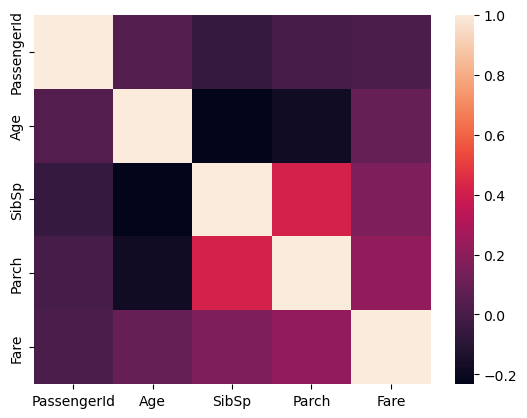

In [51]:
sns.heatmap(data.corr())

# Feature Engineering

## Parch and sibsp both are similar then we make a one column of this

In [47]:
data['Family']= data['Parch'] + data['SibSp']

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2


## Divide family size in three categorys

In [49]:
def family_types(num):
    if num == 0:
        return "Alone"
    elif num > 0 & num <=4 :
        return "Medium"
    else:
        return "Large"

In [50]:
data['family_types'] = data['Family'].apply(family_types)

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,family_types
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0,Alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1,Medium
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0,Alone
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0,Alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2,Medium


## Drop the columns

In [52]:
data.drop(columns= ['SibSp','Parch','Family'], inplace=True)

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_types
0,892,0,3,"Kelly, Mr. James",male,34,330911,7.8292,Q,Alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,363272,7.0000,S,Medium
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,240276,9.6875,Q,Alone
3,895,0,3,"Wirz, Mr. Albert",male,27,315154,8.6625,S,Alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,3101298,12.2875,S,Medium


# Detect Outliers

## handling ouliers in Age column

In [54]:
data= data[data['Age']<(data['Age'].mean()+3+data['Age'].std())]

In [55]:
data.shape

(366, 10)

## Handlling outliers in Fare Column

In [56]:
Q1= np.percentile(data['Fare'],25)
Q3= np.percentile(data['Fare'],75)
high_outlier=Q1-1.5+(Q3-Q1)
low_outlier=Q1+1.5+(Q3-Q1)

In [57]:
data=data[(data['Fare']>low_outlier) & (data['Fare']>high_outlier)]

## One hot encoding

## convert categoral column in Numbers(0s and 1s)

In [58]:
data.head()
pd.get_dummies(data=data, columns=['Pclass', 'Sex', 'Embarked', 'family_types'], drop_first =True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_types_Medium
7,899,0,"Caldwell, Mr. Albert Francis",26,248738,29.0000,1,0,1,0,1,1
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23,21228,82.2667,0,0,0,0,1,1
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",30,PC 17598,31.6833,0,0,0,0,1,0
23,915,0,"Williams, Mr. Richard Norris II",21,PC 17597,61.3792,0,0,1,0,0,1
26,918,1,"Ostby, Miss. Helene Ragnhild",22,113509,61.9792,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1292,1,"Bonnell, Miss. Caroline",30,36928,164.8667,0,0,0,0,1,0
402,1294,1,"Gibson, Miss. Dorothy Winifred",22,112378,59.4000,0,0,0,0,0,1
403,1295,0,"Carrau, Mr. Jose Pedro",17,113059,47.1000,0,0,1,0,1,0
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37,19928,90.0000,0,0,0,1,0,1


C:\Users\Fjwu\AppData\Local\Temp\ipykernel_9508\1391426211.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='summer')


<Axes: >

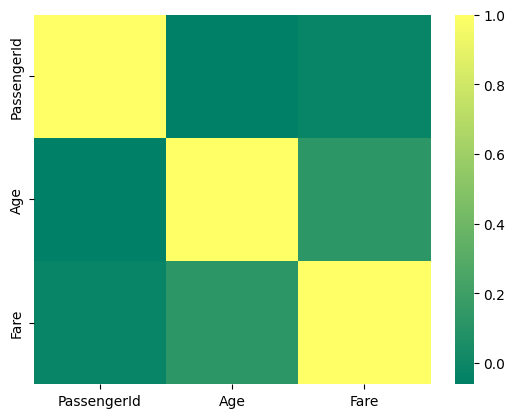

In [59]:
sns.heatmap(data.corr(),cmap='summer')